In [1]:
import numpy as np
from scipy.linalg import svd
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA as skPCA
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
class PCA:
    """Principal component anylysis
    """
    def __init__(self, n_components=None):
        self.n_components_ = n_components
        
    def fit(self, X):
        """Fit the model with X
        Parameters:
        -----------
        X: array-like of shape (n_samples, n_features)
            Input data
        """
        self.n_samples_, self.n_features_ = X.shape[0], X.shape[1]
        if self.n_components_ == None:
            self.n_components_ = min(self.n_samples_, self.n_features_)
        self.mean_ = np.mean(X, axis=0)
        X_train = X - self.mean_
        U, s, V = svd(X_train, full_matrices=False)
        self.components_ = V[:self.n_components_]
        self.explained_variance_ = np.square(s[:self.n_components_])
        self.explained_variance_ratio_ = self.explained_variance_ / np.square(np.sum(s))
        return self
    
    def transform(self, X):
        """Apply dimensionality reduction to X
        """
        X_train = X - self.mean_
        return np.dot(X_train, self.components_.T)
        

In [3]:
X, _ = load_iris(return_X_y=True)
pca1 = PCA(n_components=2).fit(X)
Xt1 = pca1.transform(X)
pca2 = skPCA(n_components=2).fit(X)
Xt2 = pca2.transform(X)

In [4]:
for i in range(pca1.components_.shape[0]):
    assert np.allclose(pca1.components_[i], pca2.components_[i]) or np.allclose(pca1.components_[i], -pca2.components_[i])

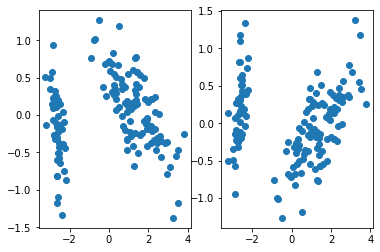

In [5]:
_, (ax1, ax2) = plt.subplots(1, 2)
ax1.scatter(Xt1[:, 0], Xt1[:, 1])
ax2.scatter(Xt2[:, 0], Xt2[:, 1])
plt.show()